In [4]:
import pandas as pd

orders_cleaned = pd.read_pickle("orders_cleaned.pkl")

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#aggregate at customer level
customer_summary = (
    orders_cleaned.groupby("customer_unique_id")
    .agg(
        total_spend=("payment_value", "sum"),
        avg_order_value=("payment_value", "mean"),
        num_orders=("order_id", "nunique"),
        avg_freight=("freight_value", "mean"),
        avg_delivery_time=("delivery_time_days", "mean")
    )
    .dropna()
)

#Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_summary)

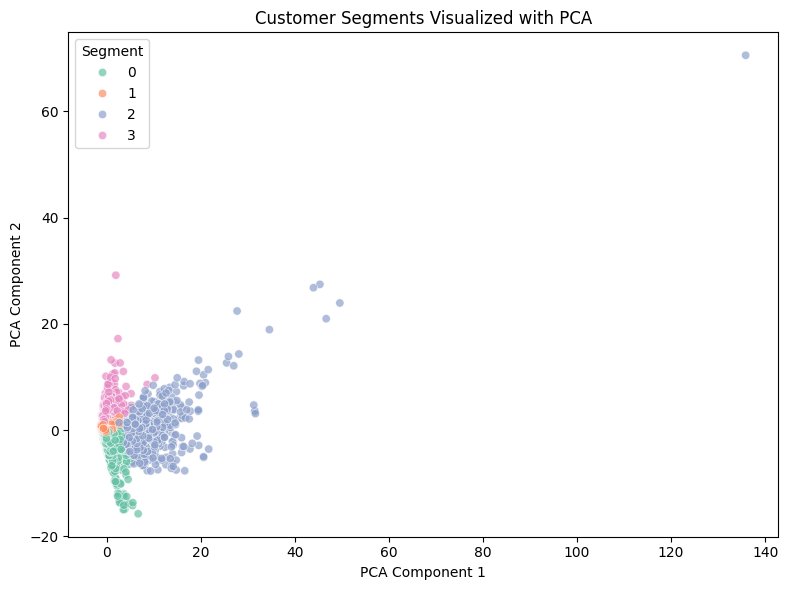

In [9]:
#KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customer_summary["segment"] = kmeans.fit_predict(X_scaled)

#PCA for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
customer_summary["pca1"] = X_pca[:, 0]
customer_summary["pca2"] = X_pca[:, 1]

#Plot PCA clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=customer_summary, x="pca1", y="pca2", hue="segment",
    palette="Set2", alpha=0.7
)
plt.title("Customer Segments Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Segment")
plt.tight_layout()
plt.show()

segment_profile = customer_summary.groupby("segment").mean().round(2)

In [10]:
segment_profile

,total_spend,avg_order_value,num_orders,avg_freight,avg_delivery_time,pca1,pca2
segment,,,,,,,
0,215.27,182.80,1.00,29.69,24.55,0.60,-1.22
1,148.34,120.46,1.00,16.06,8.64,-0.36,0.23
2,1889.29,1106.38,1.01,68.60,14.40,5.82,0.21
3,394.85,139.58,2.11,18.77,11.81,0.22,2.31


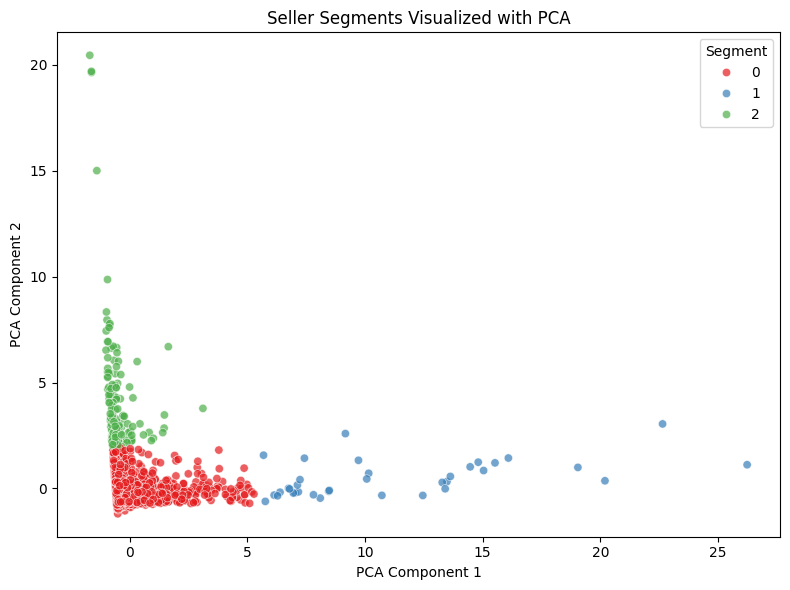

In [11]:
#Seller segmentation
seller_summary = (
    orders_cleaned.groupby("seller_id")
    .agg(
        total_sales=("payment_value", "sum"),
        avg_item_price=("price", "mean"),
        num_products=("product_id", "nunique"),
        avg_freight=("freight_value", "mean"),
        order_count=("order_id", "nunique")
    )
    .dropna()
)

#Normalize and cluster
scaler = StandardScaler()
X_seller_scaled = scaler.fit_transform(seller_summary)
kmeans_seller = KMeans(n_clusters=3, random_state=42, n_init=10)
seller_summary["segment"] = kmeans_seller.fit_predict(X_seller_scaled)

#PCA
pca_seller = PCA(n_components=2)
X_seller_pca = pca_seller.fit_transform(X_seller_scaled)
seller_summary["pca1"] = X_seller_pca[:, 0]
seller_summary["pca2"] = X_seller_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=seller_summary, x="pca1", y="pca2", hue="segment",
    palette="Set1", alpha=0.7
)
plt.title("Seller Segments Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Segment")
plt.tight_layout()
plt.show()

seller_segment_profile = seller_summary.groupby("segment").mean().round(2)

In [12]:
seller_segment_profile

,total_sales,avg_item_price,num_products,avg_freight,order_count,pca1,pca2
segment,,,,,,,
0,4740.94,127.37,9.84,20.34,24.81,-0.12,-0.22
1,143739.43,132.92,157.11,19.50,764.58,11.10,0.48
2,9414.16,1138.16,4.01,80.94,7.97,-0.50,4.11
